In [2]:
import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

ffmpg_path = os.path.abspath(r'C:\Users\pedro\OneDrive\Área de Trabalho\math_s\ffmpeg-20191101-53c21c2-win64-static\bin\ffmpeg.exe')
# os.environ['path'] += ';' + ffmpg_path
plt.rcParams['animation.ffmpeg_path'] = ffmpg_path

# Music, how come? A python approach to an old and heavy theory

Have you ever thought about it? How sound is generated? How can we give a face to something that is not visible?
In order to draw the first lines, we need to understand how sound is brought to life and then to the digital world.


When we hit the guitar string

![](https://media3.giphy.com/media/YxeWytfutfU5i/source.gif)

 it forces the air around it to oscilate as it moves. The air will carry the string vibration inducing our eardrum to vibrate as well. The eardrum alongside with a group of bones in the midle ear (Malleus, Incus and Stapes) will make the tiny hairs inside our inner ear (cochlea) vibrate into electrical pulses through the hearing nerve giving us the notion of sound!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcStkwXU5jC957UgfM36twDp326G_vgFYd9sR0taI3GH_rx82gqg)

# Yeah, this is pretty amazing. But involves a lot of biological explanations and no Python.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5gk5tRKXQtjw_akXQ8Sc2wguZpsDBkxXJIIpTVrOm3rgS7hjH)


The way that the microphone will translate those waves into something that is "computable" is pretty the same.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSXElAXEIkhqgDksKlXcW6zPVtmYjUMp2VoqQ1a_8qqU9NpH61q)

I guy called Emile Berliner

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT31mFtGc-U-PBSbETHdIat-JhkWvyVqwH7YuDSEifv697ylNKp)

was able to create a device able to vibrate with the sound carried in the wind and by this vary the "resistance" (the right term is impedance) in a given circuit. This impedance variation couses a the difference of tension vary in the "same" shape as the original string was vibrating.

## Resolution
![](https://media.giphy.com/media/xT0xeDRRrPFvjXfZF6/giphy.gif)

In the real world things have infinite resolution. Take out vision as an example, we can always amplify it with magnifiers, microscopes. We know for a fact that the only limitation for zooming is the lens capacity. In the digital world we have a harder limitation: **Memory**. In the computer when we zoom into a picture, as good as they can be, there will be a moment when the pixels will start to appear. To collect sound "pixels" (samples) to represent the sounds that we are gonna hear we will use a frequency that always get the samples with the same intervals. We will call this collection frequency sampling frequency and it will be the amount of samples we will collect in a time interval. We will find in the *Système international d'unités* (SI) a unity to anotate frequency and it is named after Heinrich
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTkcbL_P8yEkDUIxNL1pgFVSyGjsa9CRFNb__Mm2Nu1M5cTYGBb)
Hertz.

Ok, less biology, but, still, no Python.

![](https://images.idgesg.net/images/article/2018/07/python-100763894-large.jpg)


## to the code!

In [1]:
import os
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

ffmpg_path = os.path.abspath(r'C:\Users\pedro\OneDrive\Área de Trabalho\math_s\ffmpeg-20191101-53c21c2-win64-static\bin\ffmpeg.exe')
# os.environ['path'] += ';' + ffmpg_path
plt.rcParams['animation.ffmpeg_path'] = ffmpg_path

First lets create an array with all the time intervals where we will have samples between 0 and 5 seconds using 100Hz as our sampling frequency.

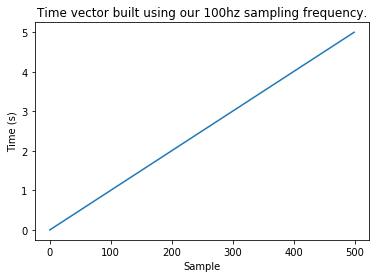

In [2]:
sampling_frequency = 100
time = 5
time_vector = np.linspace(0, time, int(sampling_frequency * time))
plt.plot(time_vector)
plt.ylabel('Time (s)')
plt.xlabel('Sample')
plt.title('Time vector built using our 100hz sampling frequency.')
plt.show()

As we can see, from 5 seconds of sample intervals using 100Hz generates 500 sample intervals. 

All this big explanation about how the air propages the vibrations in the string was to tell you that sound waves have a very similar shape to what we see in that guitar gif.
So isn't this:
![](https://media3.giphy.com/media/YxeWytfutfU5i/source.gif)

Close to this:

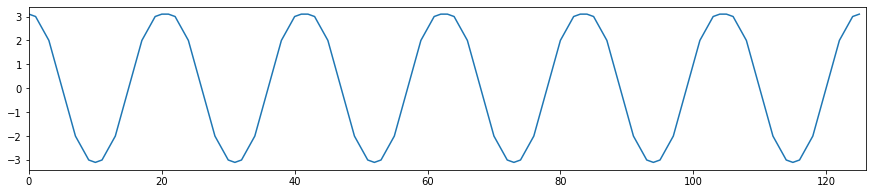

In [3]:
nrepetitions = 6
voltages = nrepetitions * [3.1, 3, 2.5, 2,  1, 0, -1, -2, -2.5, -3, -3.1, -3, -2.5, -2, -1, 0, 1, 2, 2.5, 3, 3.1]
plt.figure(figsize=(15, 3))
plt.plot(voltages)
plt.xlim([0, len(voltages)])
plt.show()

Yes, sound waves are very similar to senoids and, in order to emulate sound wave recordings we are gonna use simple cosine generataions.